# **Import Library**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

from tensorflow import keras
from keras import optimizers


In [2]:
df = pd.read_csv('data/personality-with-label.csv')
df

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10,labels
0,4.0,5.0,5.0,5.0,4.0,1.0,4.0,2.0,2.0,2.0,...,2.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0,2
1,3.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,...,3.0,3.0,5.0,3.0,1.0,3.0,2.0,5.0,3.0,0
2,2.0,4.0,3.0,1.0,2.0,4.0,4.0,2.0,2.0,3.0,...,3.0,4.0,4.0,2.0,5.0,4.0,3.0,4.0,4.0,0
3,2.0,2.0,4.0,2.0,1.0,3.0,3.0,2.0,2.0,3.0,...,1.0,2.0,1.0,4.0,4.0,3.0,4.0,3.0,3.0,1
4,3.0,3.0,5.0,3.0,3.0,1.0,5.0,1.0,1.0,2.0,...,3.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711958,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,4.0,...,3.0,3.0,2.0,4.0,4.0,3.0,3.0,4.0,4.0,4
711959,4.0,4.0,3.0,4.0,3.0,4.0,5.0,5.0,4.0,5.0,...,3.0,2.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0,3
711960,4.0,4.0,5.0,4.0,4.0,3.0,4.0,2.0,4.0,1.0,...,1.0,1.0,1.0,4.0,5.0,4.0,5.0,4.0,5.0,0
711961,2.0,3.0,2.0,1.0,2.0,4.0,4.0,4.0,2.0,4.0,...,2.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0,3.0,3


In [3]:
# Statistical measures about the data
df.describe()

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10,labels
count,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,...,711963.000000,711963.000000,711963.000000,711963.00000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000
mean,2.675364,3.357805,3.352702,2.823718,2.993576,3.306509,3.886288,2.842194,3.030153,2.768274,...,2.719799,3.800422,3.333387,3.72597,3.744856,3.857605,3.252411,4.340848,4.019911,1.986516
std,1.222582,1.139285,1.192673,1.351908,1.291578,1.288392,1.090061,1.263299,1.236890,1.268118,...,1.220807,1.011567,1.182091,0.89193,1.056115,0.881973,1.184793,0.704847,0.935402,1.501526
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000
25%,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,3.00000,3.000000,3.000000,2.000000,4.000000,3.000000,1.000000
50%,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,4.00000,4.000000,4.000000,3.000000,4.000000,4.000000,2.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,4.00000,5.000000,5.000000,4.000000,5.000000,5.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


In [4]:
# Checking the distribution of labels
df['labels'].value_counts()

labels
0    177582
4    156151
3    151818
1    118556
2    107856
Name: count, dtype: int64

In [5]:
df.groupby('labels').mean()

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN1,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10
labels,,,,,,,,,,,,,,,,,,,,,
0,2.781419,3.547189,3.427611,2.906353,3.186697,2.484858,3.210545,2.133330,2.432313,2.151868,...,3.515604,2.699238,3.649745,3.190757,3.650246,3.790756,3.921191,3.273609,4.155173,4.011082
1,1.788176,2.393848,2.281167,1.759633,2.229976,3.395054,3.880158,2.863069,3.076226,3.136442,...,3.174323,2.316517,3.559525,2.859568,3.371774,3.544721,3.433846,3.147871,4.181475,3.580063
2,3.690254,4.519341,4.463980,4.128848,3.932957,2.278195,3.132482,1.895258,2.152444,1.675605,...,3.898800,3.257037,3.958519,3.717725,4.083352,4.039720,4.370605,3.394322,4.355418,4.499184
3,2.024674,2.588850,2.681210,2.017146,2.320739,4.314297,4.637935,3.813698,3.852903,3.753376,...,3.338688,2.465557,3.837944,3.253409,3.602517,3.583910,3.533593,3.153934,4.487768,3.796184
4,3.159973,3.819630,3.966347,3.420356,3.359024,3.904150,4.449302,3.342015,3.481393,2.986712,...,3.675346,2.925476,4.008998,3.667623,3.954185,3.797420,4.067710,3.305397,4.520099,4.250379


# Separating feature and target

In [6]:
X = df.drop(columns='labels', axis=1)
y = df['labels']

# convert cluster into encoding
# Y = pd.get_dummies(y).values

In [7]:
X

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN1,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10
0,4.0,5.0,5.0,5.0,4.0,1.0,4.0,2.0,2.0,2.0,...,3.0,2.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0
1,3.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,...,3.0,3.0,3.0,5.0,3.0,1.0,3.0,2.0,5.0,3.0
2,2.0,4.0,3.0,1.0,2.0,4.0,4.0,2.0,2.0,3.0,...,4.0,3.0,4.0,4.0,2.0,5.0,4.0,3.0,4.0,4.0
3,2.0,2.0,4.0,2.0,1.0,3.0,3.0,2.0,2.0,3.0,...,2.0,1.0,2.0,1.0,4.0,4.0,3.0,4.0,3.0,3.0
4,3.0,3.0,5.0,3.0,3.0,1.0,5.0,1.0,1.0,2.0,...,5.0,3.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711958,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,4.0,...,2.0,3.0,3.0,2.0,4.0,4.0,3.0,3.0,4.0,4.0
711959,4.0,4.0,3.0,4.0,3.0,4.0,5.0,5.0,4.0,5.0,...,3.0,3.0,2.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0
711960,4.0,4.0,5.0,4.0,4.0,3.0,4.0,2.0,4.0,1.0,...,4.0,1.0,1.0,1.0,4.0,5.0,4.0,5.0,4.0,5.0
711961,2.0,3.0,2.0,1.0,2.0,4.0,4.0,4.0,2.0,4.0,...,4.0,2.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0,3.0


In [8]:
y

0         2
1         0
2         0
3         1
4         2
         ..
711958    4
711959    3
711960    0
711961    3
711962    4
Name: labels, Length: 711963, dtype: int64

# Splitting data into training and testing

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X.shape, X_train.shape, X_test.shape)

(711963, 25) (569570, 25) (142393, 25)


# Training

In [10]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(25,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')  # Jumlah output sesuai dengan jumlah klaster kepribadian
])

learning_rate = 1.0e-5 # Learning rate yang lebih kecil
optimizer = optimizers.RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3328      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 11,909
Trainable params: 11,909
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Evaluasi model pada set pengujian
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Akurasi:", accuracy)

4450/4450 [==============================] - 12s 3ms/step - loss: 2.1267 - accuracy: 0.1654
Loss: 2.1266629695892334
Akurasi: 0.1653522253036499


In [13]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    # Check accuracy
    if(logs.get('accuracy') > 0.9): # Change get parameter to loss if u want check based on loss
      # Stop if threshold is met
      print("\accuracy is grater than 0.9 so cancelling training!")
      self.model.stop_training = True

In [14]:
# Instantiate class
callbacks = myCallback()
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[callbacks])

Epoch 1/100
4450/4450 [==============================] - 19s 4ms/step - loss: 1.2237 - accuracy: 0.4899 - val_loss: 0.9399 - val_accuracy: 0.6245
Epoch 2/100
4450/4450 [==============================] - 17s 4ms/step - loss: 0.8457 - accuracy: 0.6490 - val_loss: 0.7869 - val_accuracy: 0.6610
Epoch 3/100
4450/4450 [==============================] - 20s 4ms/step - loss: 0.7604 - accuracy: 0.6692 - val_loss: 0.7375 - val_accuracy: 0.6750
Epoch 4/100
4450/4450 [==============================] - 20s 4ms/step - loss: 0.7232 - accuracy: 0.6810 - val_loss: 0.7084 - val_accuracy: 0.6853
Epoch 5/100
4450/4450 [==============================] - 20s 5ms/step - loss: 0.6989 - accuracy: 0.6901 - val_loss: 0.6871 - val_accuracy: 0.6942
Epoch 6/100
4450/4450 [==============================] - 20s 5ms/step - loss: 0.6794 - accuracy: 0.6981 - val_loss: 0.6690 - val_accuracy: 0.7024
Epoch 7/100
4450/4450 [==============================] - 20s 5ms/step - loss: 0.6619 - accuracy: 0.7060 - val_loss: 0.6521 -

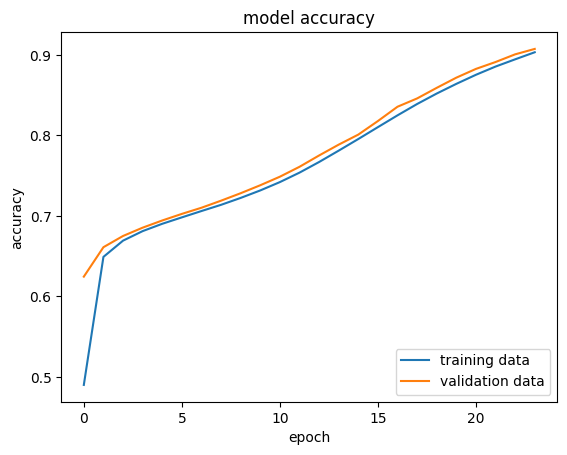

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

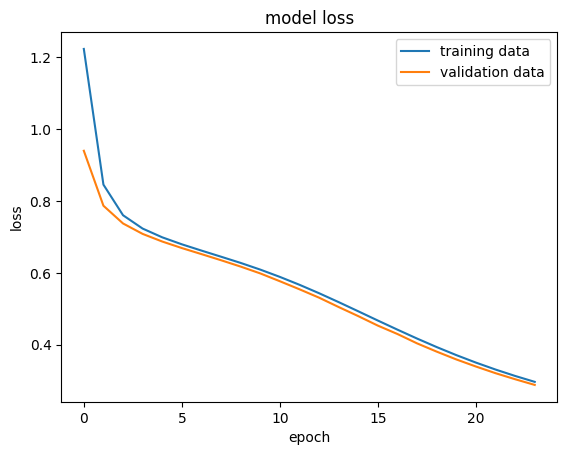

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [17]:
# my_data = [2,3,3,2,2,5,2,4,5,4,2,3,4,5,2,2,1,1,3,1,2,5,1,5,2]
# my_data = np.array(my_data).reshape(1, -1)

In [17]:
predictions = model.predict(X_test)
predicted_clusters = np.argmax(predictions, axis=1)
print(predicted_clusters)

4450/4450 [==============================] - 9s 2ms/step
[3 0 2 ... 2 3 0]


In [18]:
y_test.head(20)

124267    3
150876    0
441708    2
206761    3
519110    4
601074    4
653331    1
517997    3
662629    0
545851    4
168720    4
460293    0
264137    1
493603    0
206066    1
691751    4
197709    0
635771    0
10132     0
381110    3
Name: labels, dtype: int64

In [19]:
predicted_clusters[:20]

array([3, 0, 2, 3, 4, 4, 1, 3, 0, 4, 4, 0, 1, 0, 1, 4, 0, 0, 0, 3],
      dtype=int64)

In [20]:
# Calculate precision
precision = precision_score(y_test, predicted_clusters, average='micro')

# Calculate recall
recall = recall_score(y_test, predicted_clusters, average='micro')

# Print the results
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9074111789203121
Recall: 0.9074111789203121


## Saved Model

In [21]:
MODEL_DIR = 'persona_model'

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")


Already saved a model, cleaning up



'rm' is not recognized as an internal or external command,
operable program or batch file.


INFO:tensorflow:Assets written to: persona_model\1\assets


In [22]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['dense_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 25)
        name: serving_default_dense_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_2'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 5)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
The MetaGraph with tag set ['serve'] contains the following ops: {'MergeV2Checkpoints', 'Placeholder', 'StaticRegexFullMatch', 'Rel